<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_ARMA%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Подготовка данных
Загружаем все данные и определяем нужный нам ряд (ярко-выраженная сезонность)

In [2]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

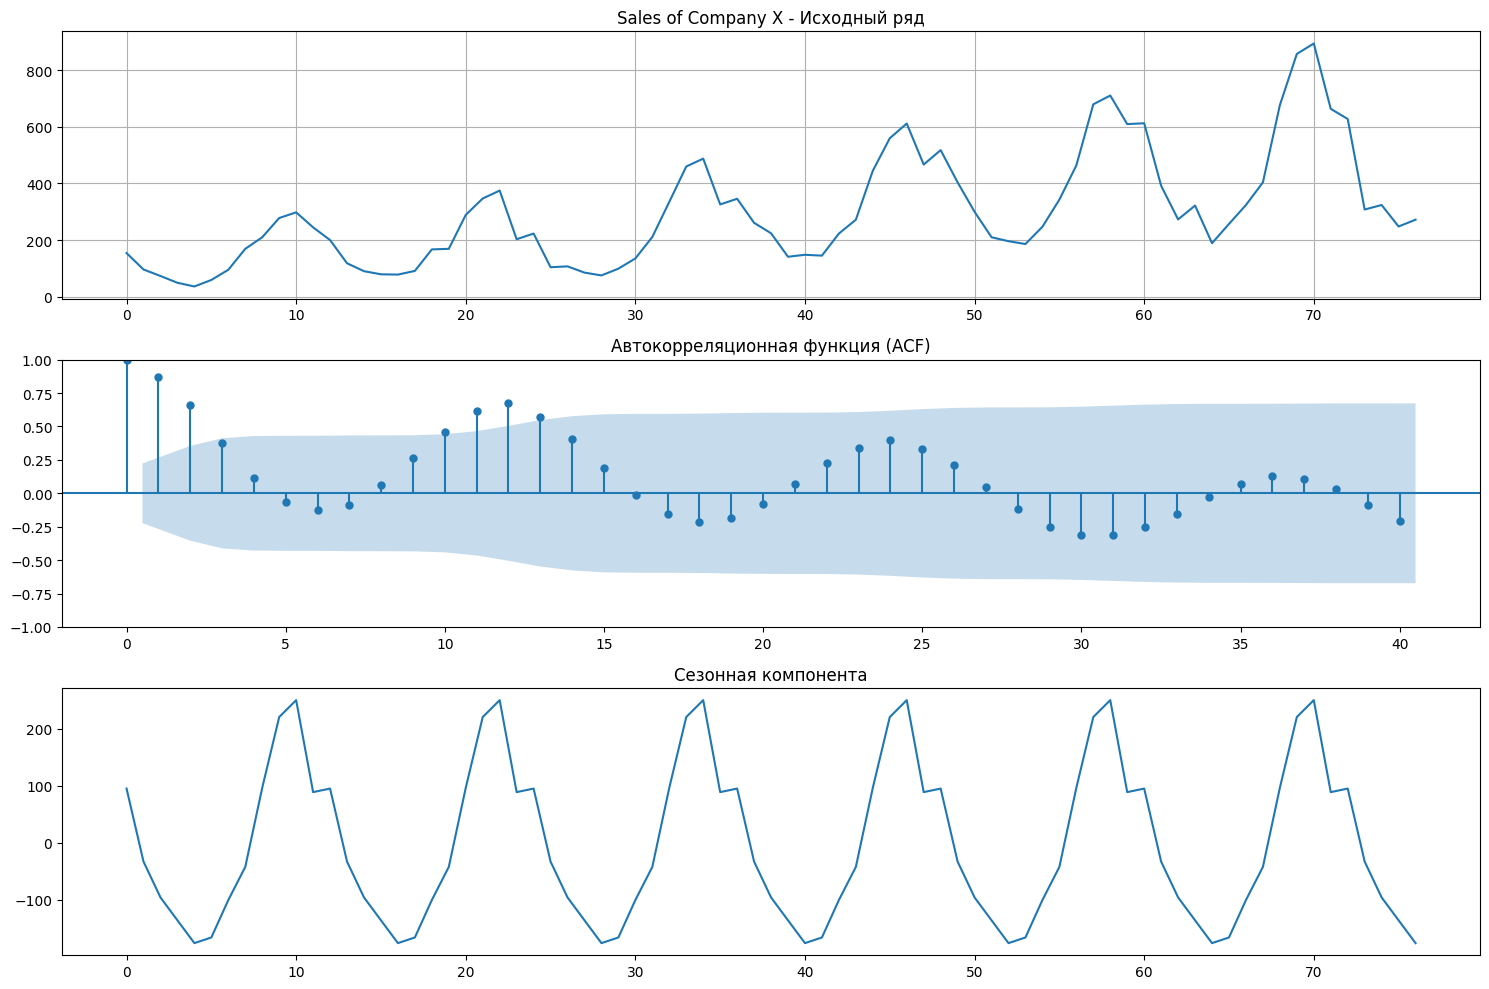

Sales of Company X - ADF тест: p-value = 0.9889
Стационарный: Нет
--------------------------------------------------


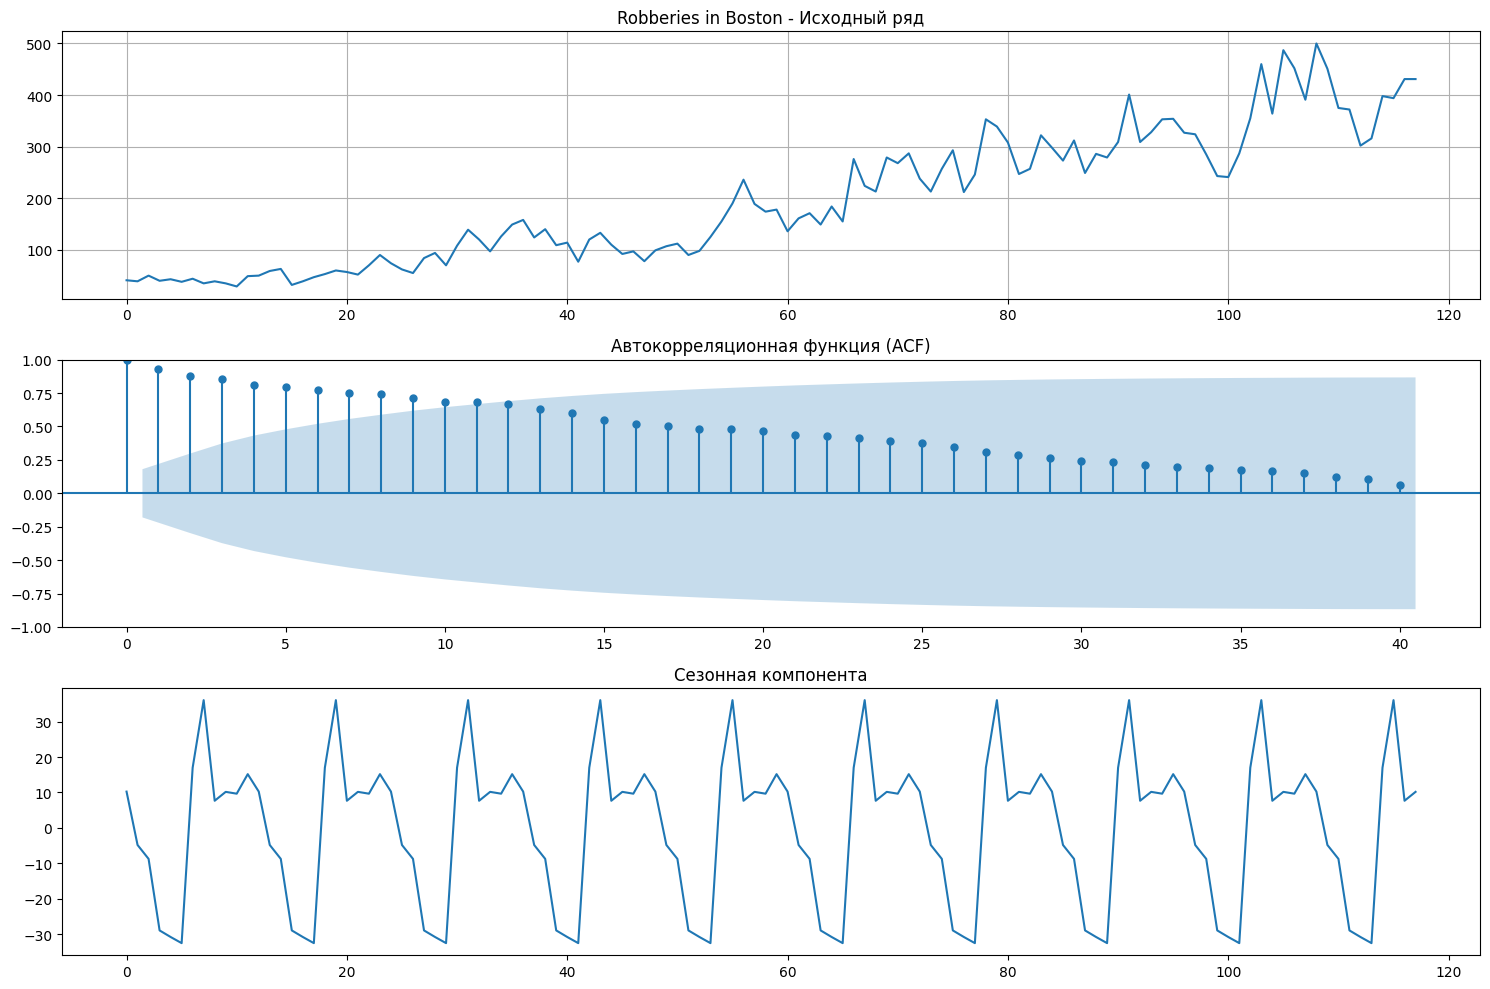

Robberies in Boston - ADF тест: p-value = 0.9943
Стационарный: Нет
--------------------------------------------------


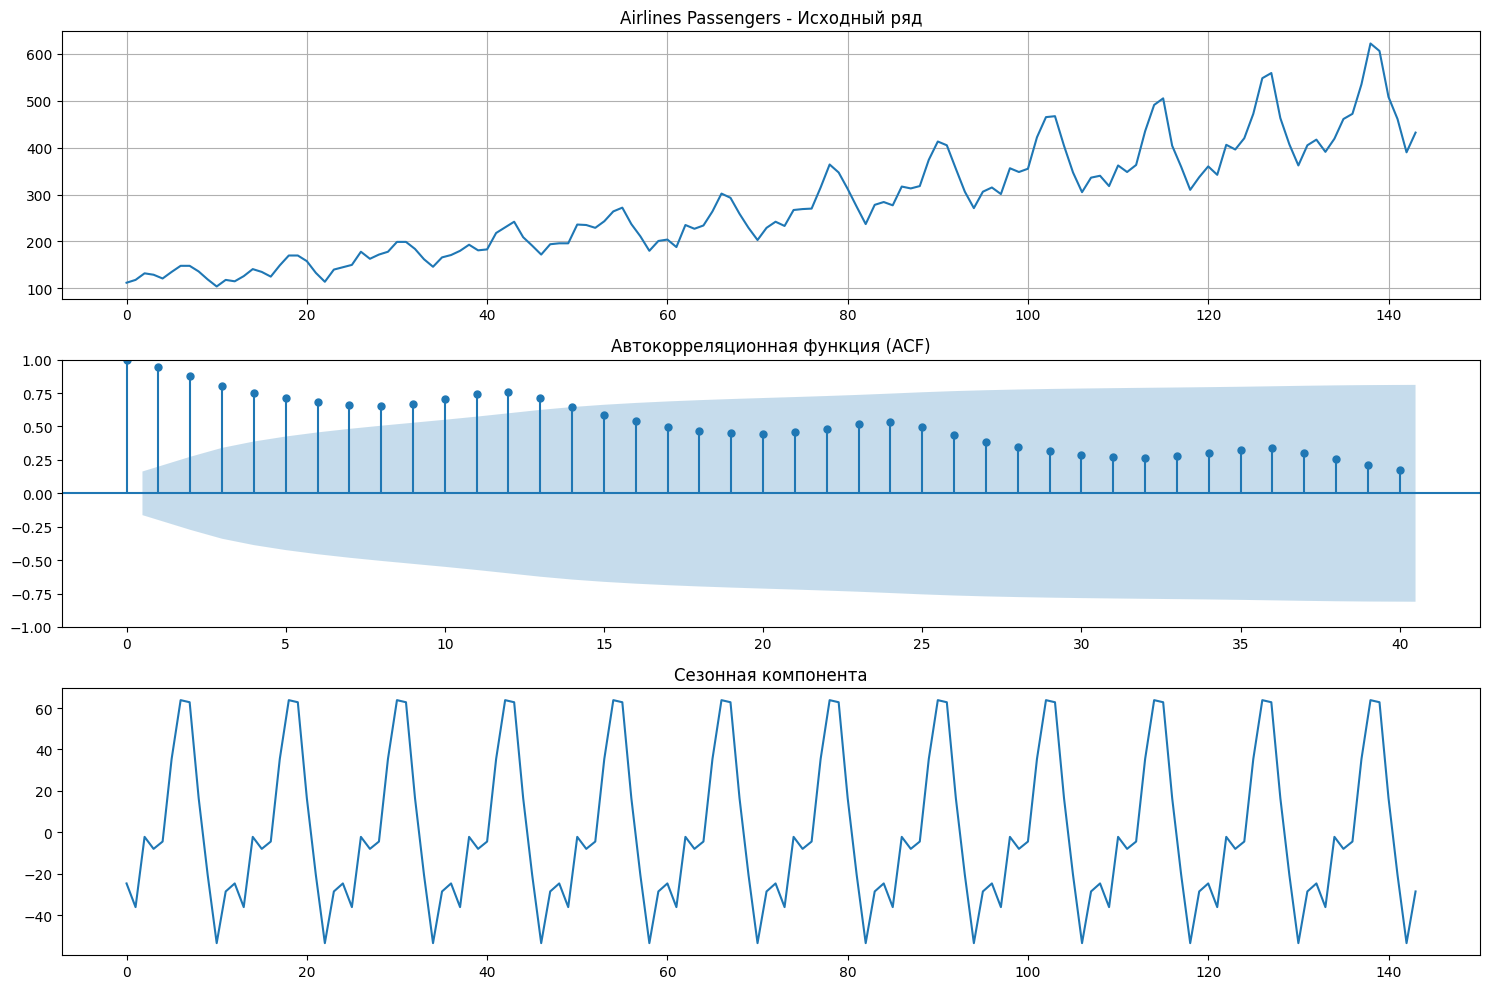

Airlines Passengers - ADF тест: p-value = 0.9919
Стационарный: Нет
--------------------------------------------------


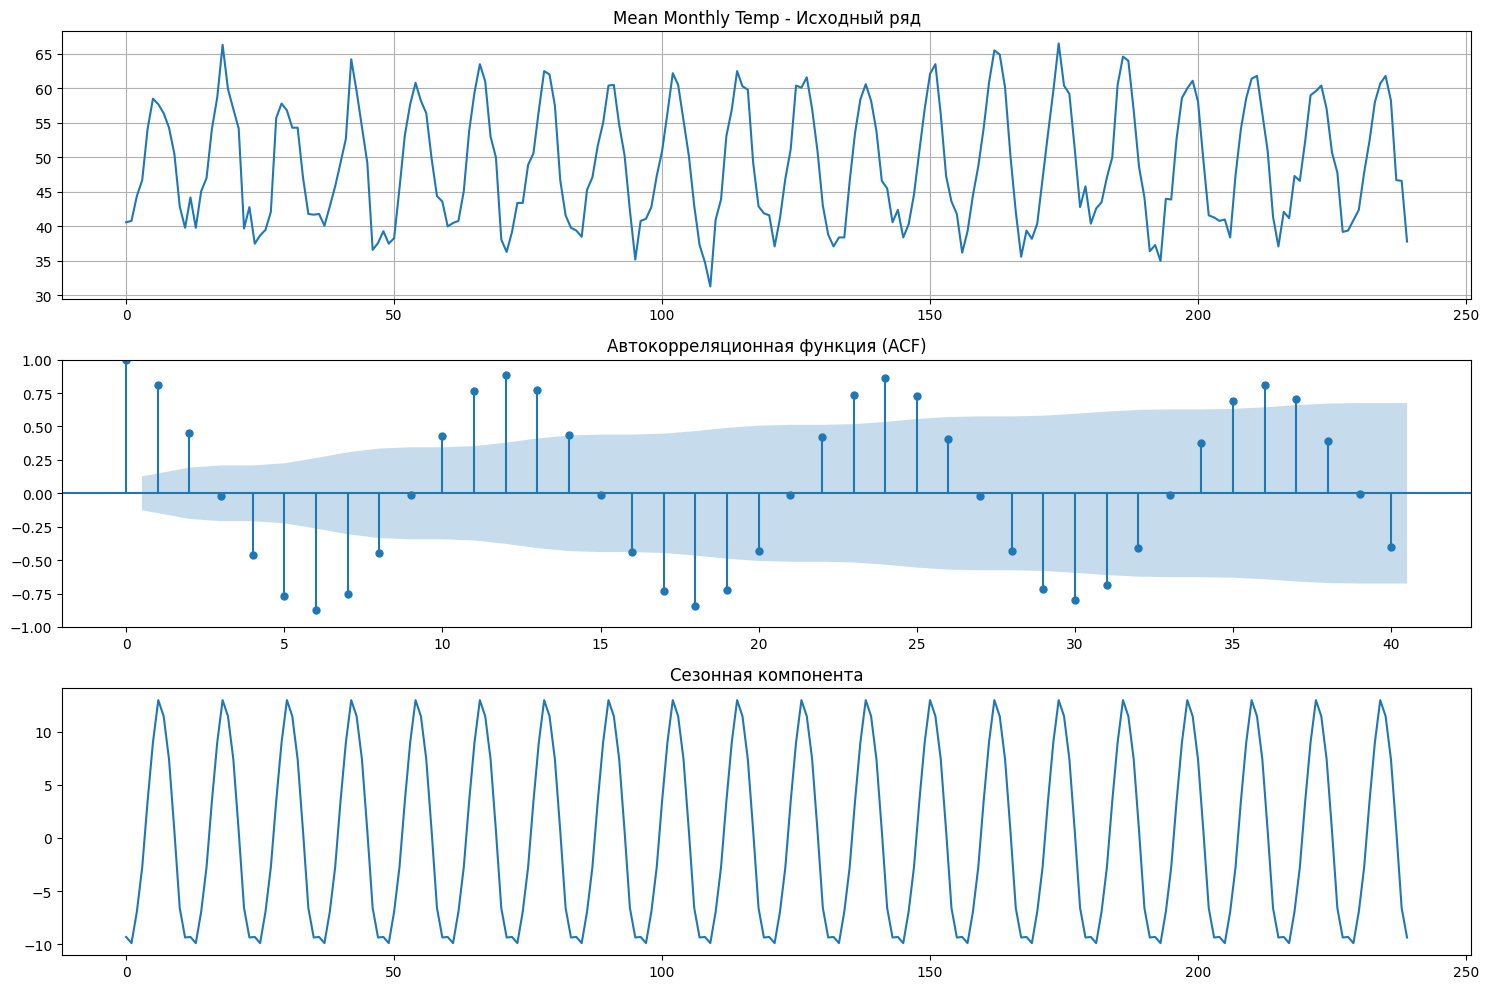

Mean Monthly Temp - ADF тест: p-value = 0.0170
Стационарный: Да
--------------------------------------------------


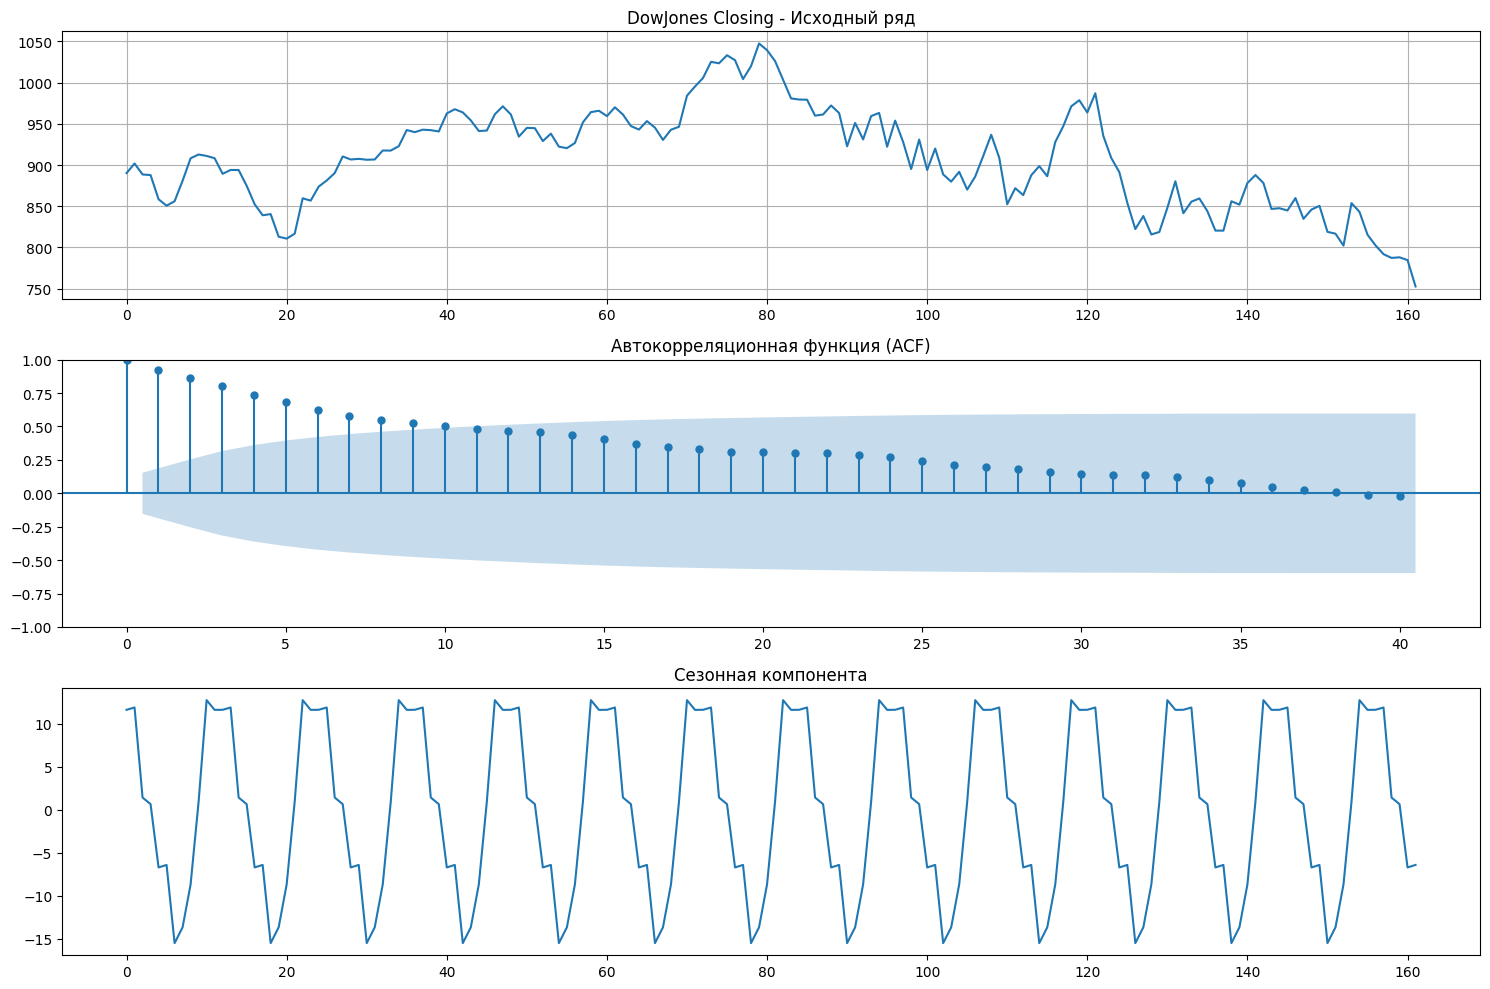

DowJones Closing - ADF тест: p-value = 0.6225
Стационарный: Нет
--------------------------------------------------


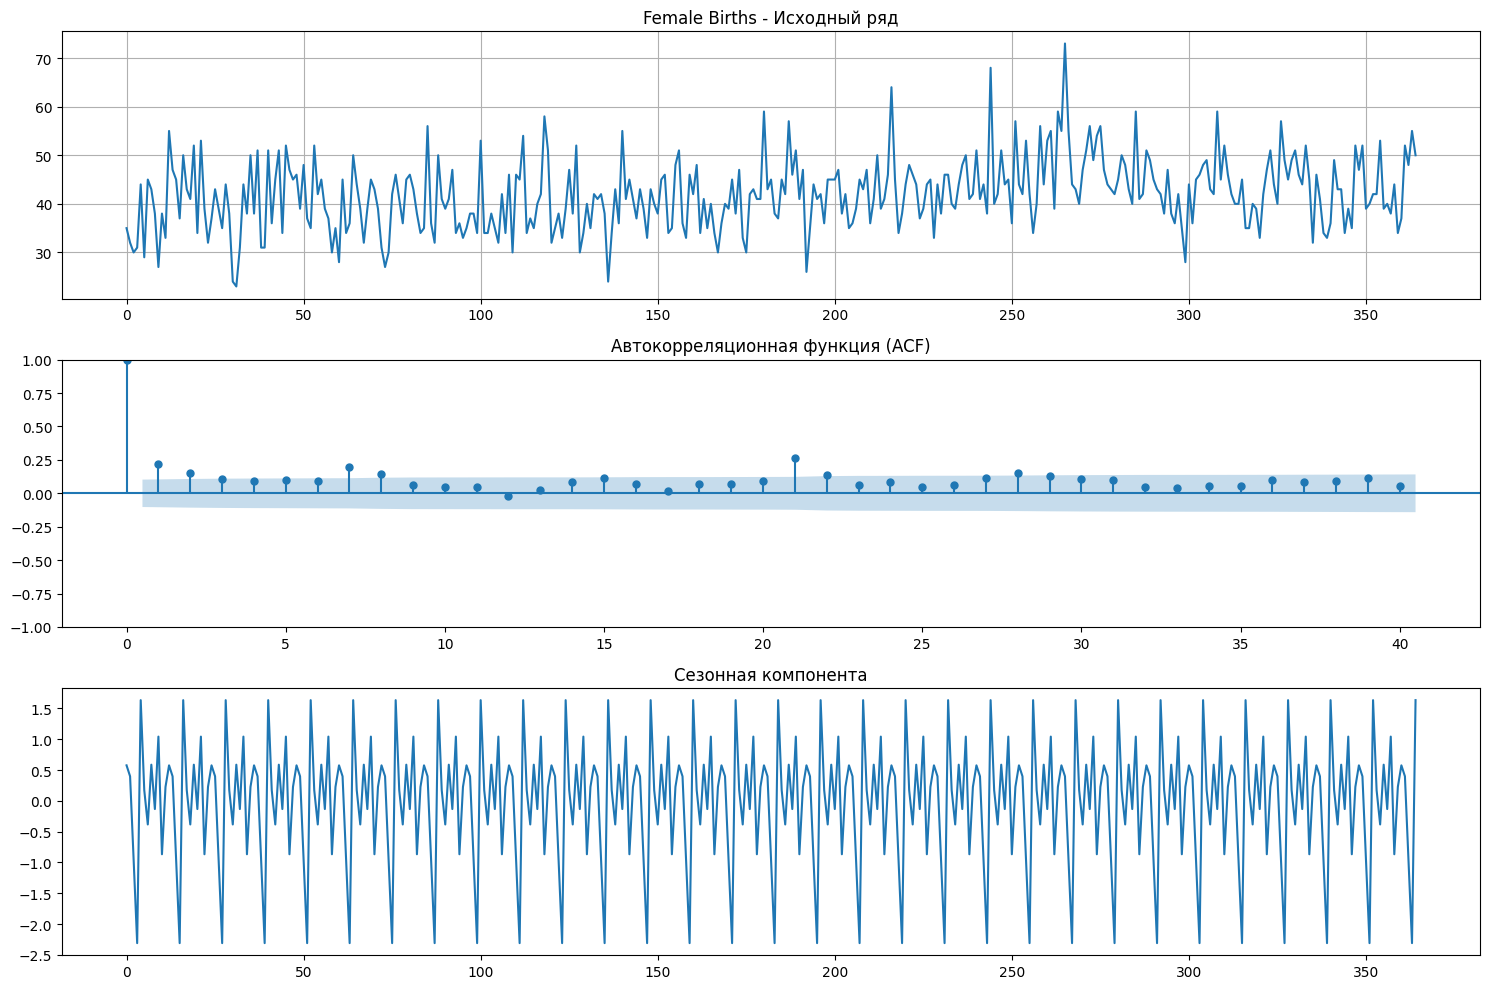

Female Births - ADF тест: p-value = 0.0001
Стационарный: Да
--------------------------------------------------


In [3]:
# Функция для анализа временных рядов
def analyze_time_series(data, title):
    if data.shape[1] >= 2:
        # Предполагаем, что первый столбец - дата, второй - значения
        values = data.iloc[:, 1]
    else:
        values = data.iloc[:, 0]

    plt.figure(figsize=(15, 10))

    # Исходный ряд
    plt.subplot(3, 1, 1)
    plt.plot(values)
    plt.title(f'{title} - Исходный ряд')
    plt.grid(True)

    # ACF
    plt.subplot(3, 1, 2)
    plot_acf(values, lags=40, ax=plt.gca())
    plt.title('Автокорреляционная функция (ACF)')

    # Сезонная декомпозиция
    plt.subplot(3, 1, 3)
    try:
        decomposition = seasonal_decompose(values.dropna(), period=12, model='additive')
        decomposition.seasonal.plot()
        plt.title('Сезонная компонента')
    except:
        plt.text(0.5, 0.5, 'Невозможно выполнить сезонную декомпозицию',
                ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

    # Тест на стационарность
    result = adfuller(values.dropna())
    print(f'{title} - ADF тест: p-value = {result[1]:.4f}')
    print(f'Стационарный: {"Да" if result[1] < 0.05 else "Нет"}')
    print('-' * 50)

# Анализируем все ряды
datasets = {
    'Sales of Company X': sales_of_company_x,
    'Robberies in Boston': robberies_in_boston,
    'Airlines Passengers': airlines_passengers,
    'Mean Monthly Temp': mean_monthly_temp,
    'DowJones Closing': dowjones_closing,
    'Female Births': female_births
}

for name, data in datasets.items():
    analyze_time_series(data, name)

Выбираем ряд с авиапассажирами - у него ярко выраженная сезонность

In [4]:
# Подготовка данных
airlines_data = airlines_passengers.iloc[:, 1]  # предположим, что значения во втором столбце
airlines_data = airlines_data.dropna()

# Преобразуем в временной ряд с датами
dates = pd.date_range(start='1949-01', periods=len(airlines_data), freq='M')
airlines_series = pd.Series(airlines_data.values, index=dates)

print(f"Длина ряда: {len(airlines_series)}")
print(f"Период: с {airlines_series.index[0]} по {airlines_series.index[-1]}")

Длина ряда: 144
Период: с 1949-01-31 00:00:00 по 1960-12-31 00:00:00


#Построение модели ARIMA

Train size: 115
Test size: 29
ARIMA(0,0,0) - AIC: 1367.73
ARIMA(0,0,1) - AIC: 1232.92
ARIMA(0,0,2) - AIC: 1178.06
ARIMA(0,0,3) - AIC: 1113.46
ARIMA(0,0,4) - AIC: 1106.33
ARIMA(0,0,5) - AIC: 1085.58
ARIMA(0,1,0) - AIC: 1076.27
ARIMA(0,1,1) - AIC: 1063.65
ARIMA(0,1,2) - AIC: 1060.69
ARIMA(0,1,3) - AIC: 1062.47
ARIMA(0,1,4) - AIC: 1050.07
ARIMA(0,1,5) - AIC: 1051.62
ARIMA(0,2,0) - AIC: 1105.71
ARIMA(0,2,1) - AIC: 1072.85
ARIMA(0,2,2) - AIC: 1060.35
ARIMA(0,2,3) - AIC: 1057.37
ARIMA(0,2,4) - AIC: 1059.15
ARIMA(0,2,5) - AIC: 1038.72
ARIMA(1,0,0) - AIC: 1092.21
ARIMA(1,0,1) - AIC: 1078.07
ARIMA(1,0,2) - AIC: 1076.30
ARIMA(1,0,3) - AIC: 1077.49
ARIMA(1,0,4) - AIC: 1066.62
ARIMA(1,0,5) - AIC: 1082.66
ARIMA(1,1,0) - AIC: 1068.54
ARIMA(1,1,1) - AIC: 1058.25
ARIMA(1,1,2) - AIC: 1057.33
ARIMA(1,1,3) - AIC: 1058.95
ARIMA(1,1,4) - AIC: 1051.66
ARIMA(1,1,5) - AIC: 1053.62
ARIMA(1,2,0) - AIC: 1101.10
ARIMA(1,2,1) - AIC: 1065.18
ARIMA(1,2,2) - AIC: 1054.89
ARIMA(1,2,3) - AIC: 1056.06
ARIMA(1,2,4) - AIC

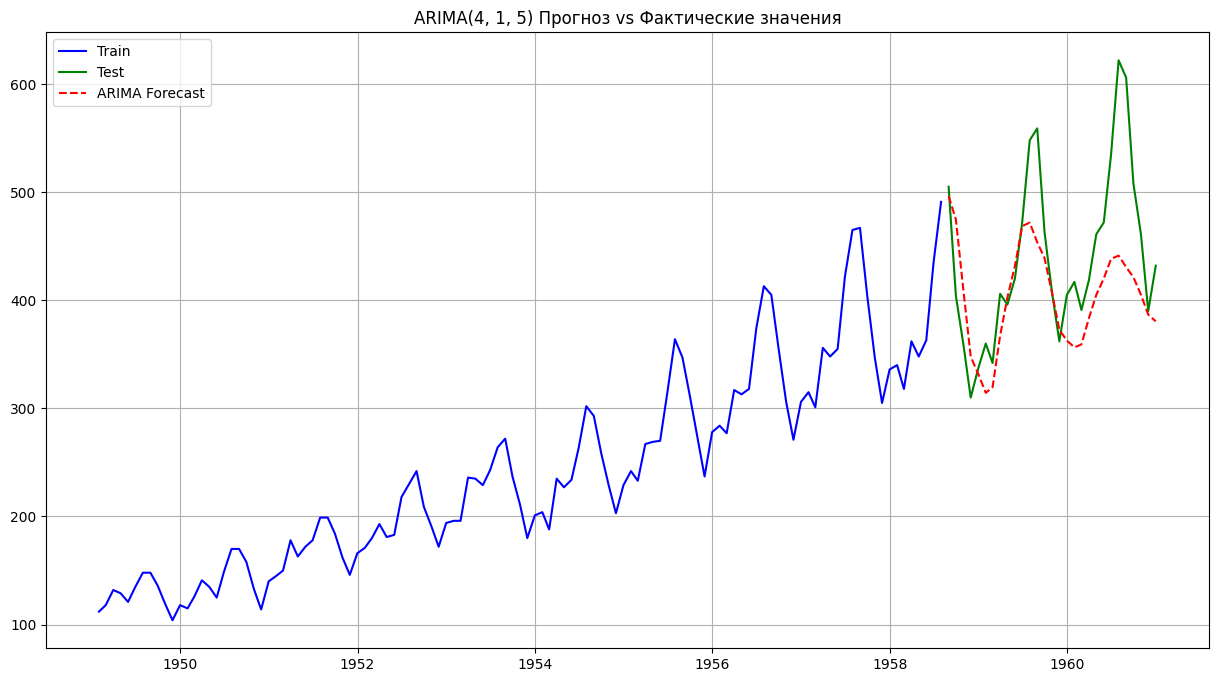

RMSE: 67.07


In [5]:
# Функция для поиска оптимальных параметров ARIMA
def find_best_arima(series, max_p=5, max_d=2, max_q=5):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    fitted_model = model.fit()

                    if fitted_model.aic < best_aic:
                        best_aic = fitted_model.aic
                        best_order = (p, d, q)
                        best_model = fitted_model

                    print(f'ARIMA({p},{d},{q}) - AIC: {fitted_model.aic:.2f}')

                except:
                    continue

    print(f'\nЛучшая модель: ARIMA{best_order} с AIC: {best_aic:.2f}')
    return best_model, best_order

# Разделение на train/test
train_size = int(len(airlines_series) * 0.8)
train = airlines_series[:train_size]
test = airlines_series[train_size:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

# Поиск лучшей модели ARIMA
best_model, best_order = find_best_arima(train)

# Прогноз на тестовой выборке
forecast = best_model.forecast(steps=len(test))
forecast_index = test.index

# Визуализация результатов
plt.figure(figsize=(15, 8))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title(f'ARIMA{best_order} Прогноз vs Фактические значения')
plt.legend()
plt.grid(True)
plt.show()

# Оценка качества
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

#Остатки

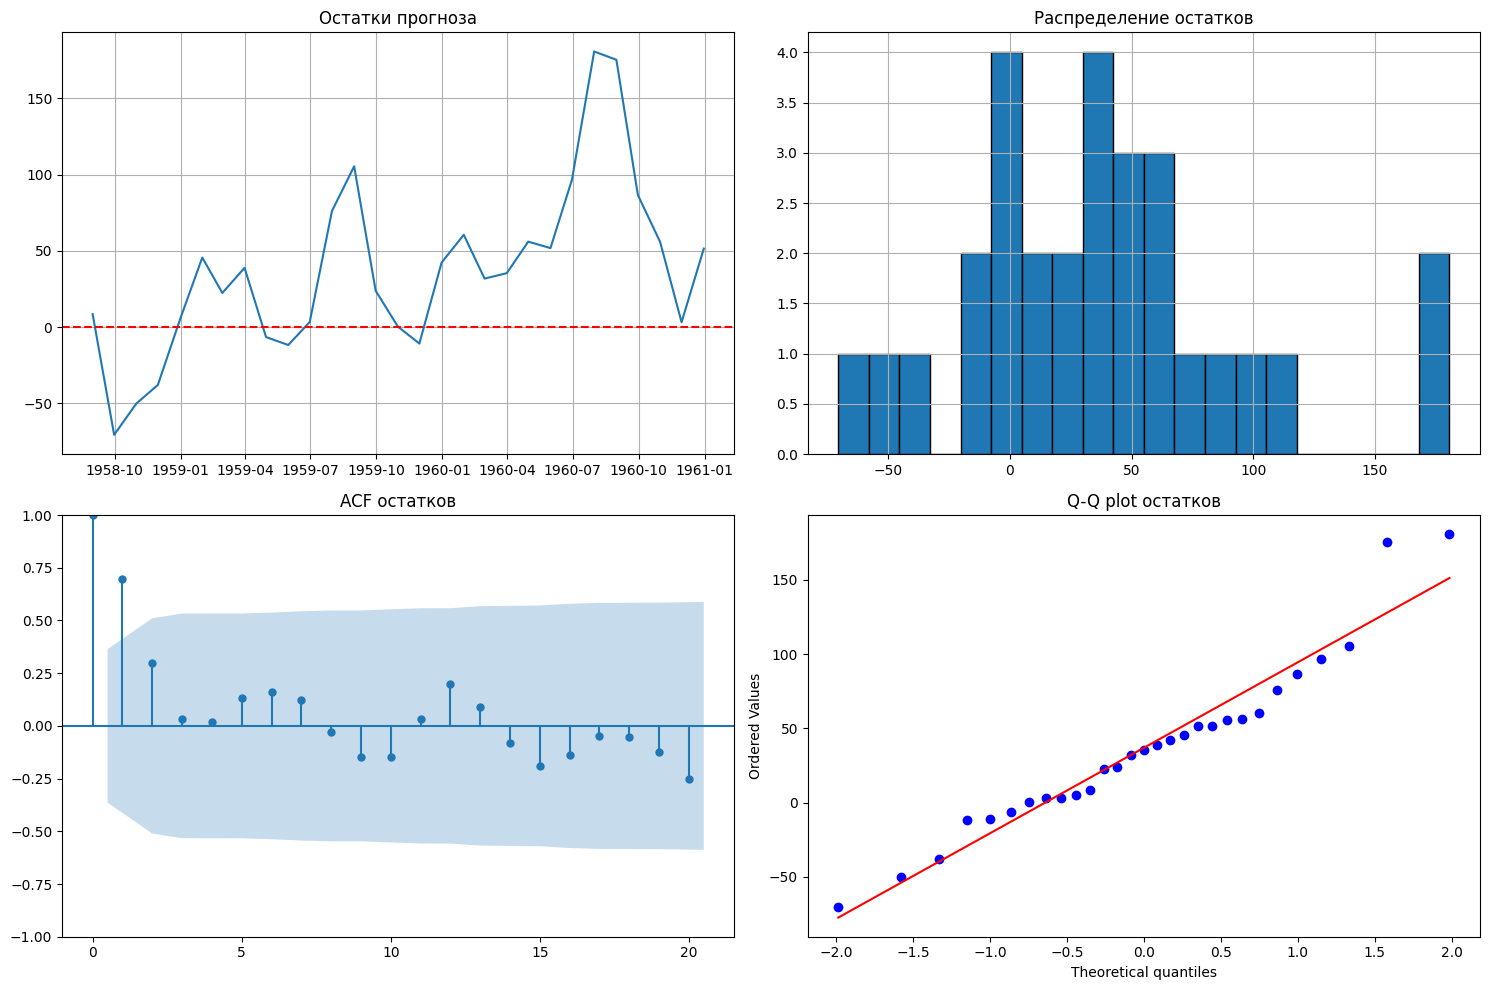

Анализ остатков:
Среднее остатков: 36.8975
Стандартное отклонение: 57.0059
Тест на нормальность (Shapiro-Wilk): p-value = 0.1749


In [6]:
# Анализ остатков
residuals = test - forecast

plt.figure(figsize=(15, 10))

# Остатки временной ряд
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Остатки прогноза')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)

# Распределение остатков
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Распределение остатков')
plt.grid(True)

# ACF остатков
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF остатков')

# Q-Q plot остатков
plt.subplot(2, 2, 4)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot остатков')

plt.tight_layout()
plt.show()

# Статистики остатков
print("Анализ остатков:")
print(f"Среднее остатков: {residuals.mean():.4f}")
print(f"Стандартное отклонение: {residuals.std():.4f}")
print(f"Тест на нормальность (Shapiro-Wilk): p-value = {stats.shapiro(residuals)[1]:.4f}")

получается что высокая дисперсия и волатильость прогноза? (распыление). Надо работать с дисперсией, ARIMA это не умеет

p-value > 0.05 - НЕ отвергаем гипотезу о нормальности распределения

#Эксперименты с ML

In [10]:
def create_features(series, n_lags=6, n_seasonal_lags=12):
    df = pd.DataFrame({'y': series})

    # Лаги
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = series.shift(i)

    # Сезонные лаги
    for i in range(1, 4):
        df[f'seasonal_lag_{i*12}'] = series.shift(i * 12)

    # Временные признаки
    df['month'] = series.index.month
    df['year'] = series.index.year
    df['quarter'] = series.index.quarter

    # Скользящие средние
    df['rolling_mean_3'] = series.rolling(window=3).mean()
    df['rolling_mean_12'] = series.rolling(window=12).mean()

    return df

In [11]:
# Создание признаков
features_df = create_features(airlines_series)

In [12]:
# Удаляем только начальные NaN (из-за лагов)
features_df = features_df.dropna()

print(f"Размер features_df после удаления NaN: {len(features_df)}")

Размер features_df после удаления NaN: 108


In [14]:
#разделение на train/test с учетом индексов
split_point = int(len(features_df) * 0.8)
X = features_df.drop('y', axis=1)
y = features_df['y']

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print(f"ML - Train size: {len(X_train)}")
print(f"ML - Test size: {len(X_test)}")

ML - Train size: 86
ML - Test size: 22


## Эксперимент 1: Random Forest с базовыми признаками

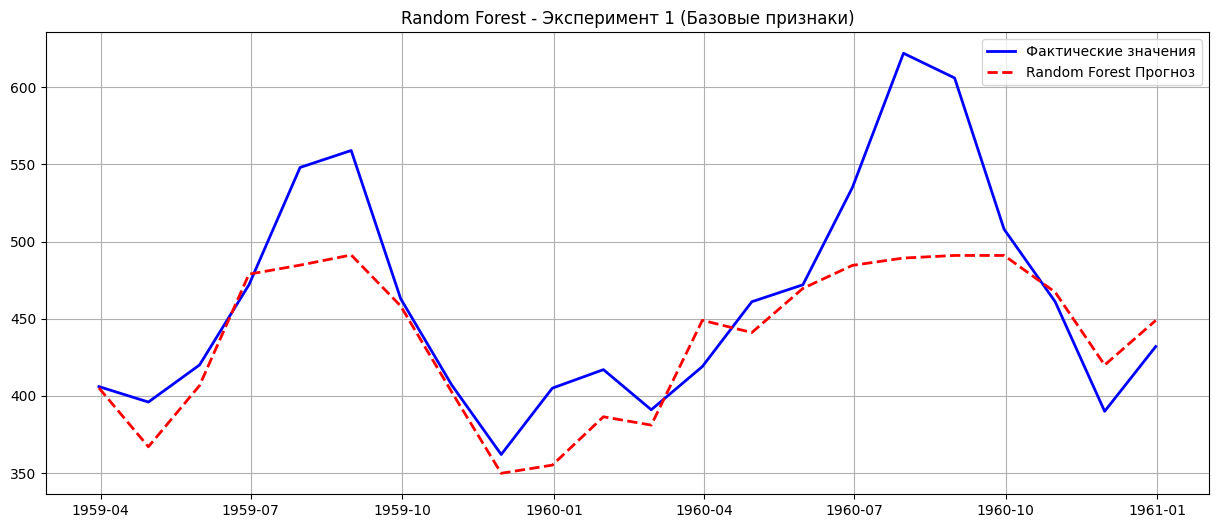

RMSE Random Forest (Эксперимент 1): 47.46


In [15]:
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model1.fit(X_train, y_train)

y_pred1 = rf_model1.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Фактические значения', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred1, label='Random Forest Прогноз', color='red', linestyle='--', linewidth=2)
plt.title('Random Forest - Эксперимент 1 (Базовые признаки)')
plt.legend()
plt.grid(True)
plt.show()

mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print(f"RMSE Random Forest (Эксперимент 1): {rmse1:.2f}")

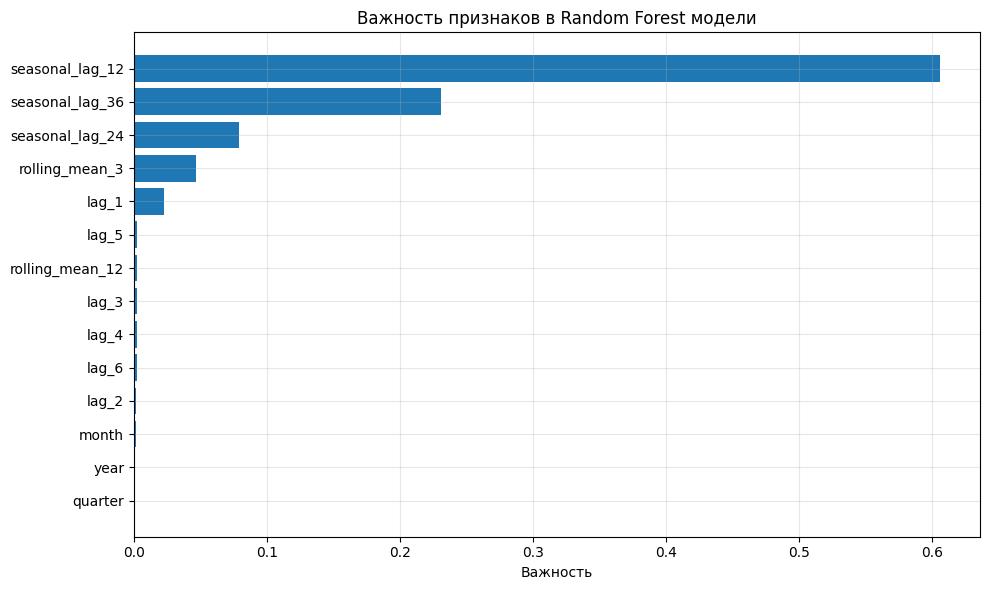

In [16]:
# Анализ важности признаков
plt.figure(figsize=(10, 6))
feature_importance1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model1.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance1['feature'], feature_importance1['importance'])
plt.title('Важность признаков в Random Forest модели')
plt.xlabel('Важность')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Сравнение результатов

In [17]:
print("\n" + "="*50)
print("СРАВНЕНИЕ ARIMA И RANDOM FOREST:")
print("="*50)
print(f"ARIMA{best_order}: RMSE = {rmse:.2f}")
print(f"Random Forest: RMSE = {rmse1:.2f}")



СРАВНЕНИЕ ARIMA И RANDOM FOREST:
ARIMA(4, 1, 5): RMSE = 67.07
Random Forest: RMSE = 47.46


In [18]:
# Анализ улучшения
improvement_vs_arima = ((rmse - rmse1) / rmse) * 100
print(f"\nУлучшение Random Forest по сравнению с ARIMA: {improvement_vs_arima:+.1f}%")


Улучшение Random Forest по сравнению с ARIMA: +29.2%


In [19]:
# Итоговая визуализация сравнения обеих моделей
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

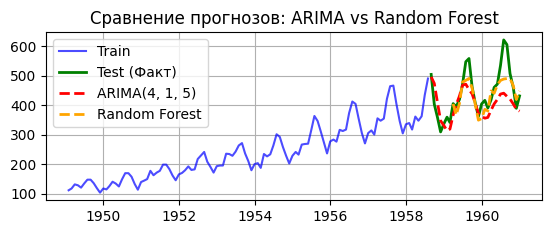

In [20]:
# График 1: Сравнение прогнозов
plt.subplot(2, 1, 1)
plt.plot(train.index, train, label='Train', color='blue', alpha=0.7)
plt.plot(test.index, test, label='Test (Факт)', color='green', linewidth=2)
plt.plot(forecast_index, forecast, label=f'ARIMA{best_order}', color='red', linestyle='--', linewidth=2)
plt.plot(y_test.index, y_pred1, label='Random Forest', color='orange', linestyle='--', linewidth=2)
plt.title('Сравнение прогнозов: ARIMA vs Random Forest')
plt.legend()
plt.grid(True)

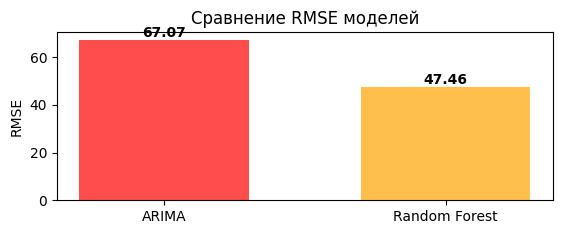

In [21]:
# График 2: Сравнение ошибок
plt.subplot(2, 1, 2)
models = ['ARIMA', 'Random Forest']
rmses = [rmse, rmse1]
colors = ['red', 'orange']

bars = plt.bar(models, rmses, color=colors, alpha=0.7, width=0.6)
plt.title('Сравнение RMSE моделей')
plt.ylabel('RMSE')
for i, v in enumerate(rmses):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

In [23]:
# Ошибки ARIMA
arima_errors = np.abs(test - forecast)
# Ошибки Random Forest
rf_errors = np.abs(y_test - y_pred1)

print(f"Средняя абсолютная ошибка (MAE):")
print(f"ARIMA: {arima_errors.mean():.2f}")
print(f"Random Forest: {rf_errors.mean():.2f}")

print(f"\nМаксимальная ошибка:")
print(f"ARIMA: {arima_errors.max():.2f}")
print(f"Random Forest: {rf_errors.max():.2f}")


Средняя абсолютная ошибка (MAE):
ARIMA: 49.83
Random Forest: 32.42

Максимальная ошибка:
ARIMA: 180.71
Random Forest: 132.69


ПО RMSE Random Forest (47.46) значительно лучше ARIMA (67.07).
При этом попытаемся понять насколько 47,46 это хорошо или плохо

In [25]:
# Для контекста нужно посмотреть на масштаб исходных данных
# Основные статистики исходного ряда
print("Статистики исходного ряда пассажиров:")
print(f"Среднее значение: {airlines_series.mean():.2f}")
print(f"Стандартное отклонение: {airlines_series.std():.2f}")
print(f"Минимум: {airlines_series.min():.2f}")
print(f"Максимум: {airlines_series.max():.2f}")
print(f"Размах: {airlines_series.max() - airlines_series.min():.2f}")

# Относительные метрики ошибки
mean_value = airlines_series.mean()
rmse_relative = (rmse1 / mean_value) * 100
std_relative = (rmse1 / airlines_series.std()) * 100
range_relative = (rmse1 / (airlines_series.max() - airlines_series.min())) * 100

print(f"\nОТНОСИТЕЛЬНЫЕ ПОКАЗАТЕЛИ:")
print(f"RMSE / Среднее значение: {rmse_relative:.1f}%")
print(f"RMSE / Стандартное отклонение: {std_relative:.1f}%")
print(f"RMSE / Размах данных: {range_relative:.1f}%")

Статистики исходного ряда пассажиров:
Среднее значение: 280.30
Стандартное отклонение: 119.97
Минимум: 104.00
Максимум: 622.00
Размах: 518.00

ОТНОСИТЕЛЬНЫЕ ПОКАЗАТЕЛИ:
RMSE / Среднее значение: 16.9%
RMSE / Стандартное отклонение: 39.6%
RMSE / Размах данных: 9.2%


In [26]:
# Пример расчета
if mean_value > 0:
    error_percentage = (rmse1 / mean_value) * 100
    print(f"\nВЫВОД ДЛЯ RMSE = {rmse1:.2f}:")
    print(f"Ошибка составляет {error_percentage:.1f}% от среднего значения")

    if error_percentage < 10:
        print("🎯 ОТЛИЧНЫЙ РЕЗУЛЬТАТ - высокая точность")
    elif error_percentage < 20:
        print("✅ ХОРОШИЙ РЕЗУЛЬТАТ - приемлемая точность")
    elif error_percentage < 30:
        print("⚠️ УДОВЛЕТВОРИТЕЛЬНО - есть пространство для улучшений")
    else:
        print("❌ НИЗКАЯ ТОЧНОСТЬ - требуется доработка модели")


ВЫВОД ДЛЯ RMSE = 47.46:
Ошибка составляет 16.9% от среднего значения
✅ ХОРОШИЙ РЕЗУЛЬТАТ - приемлемая точность


# Random Forest лучше прогнозирует временные ряды с ярко-выраженной сезонностью.